# Video Game Sales with Ratings
    
## 칼럼 명
    Name: 게임의 이름
    Platform: 게임이 동작하는 콘솔
    Year_of_Release: 발매 년도
    Genre: 게임의 장르
    Publisher: 게임의 유통사
    NA_Sales: 북미 판매량 (Millions)
    EU_Sales: 유럽 연합 판매량 (Millions)
    JP_Sales: 일본 판매량 (Millions)
    Other_Sales: 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미) (Millions)
    Global_Sales: 전국 판매량
    Critic_Score: Metacritic 스태프 점수
    Critic_Count: Critic_Score에 사용된 점수의 수
    User_Score: Metacritic 구독자의 점수
    User_Count: User_Score에 사용된 점수의 수
    Developer: 게임의 개발사
    Rating: ESRB 등급 (19+, 17+, 등등)

    
- 데이터 출처: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings


# 데이터 로드 및 라이브러리 설치

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/study/게임 리뷰 회귀/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [7]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


#EDA 및 데이터 기초 통계 분석


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## 결측 데이터 확인 및 처리


In [15]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [16]:
df.dropna(inplace=True)

## 수치형 데이터 파악- 히스토그램 시각화

In [33]:
df.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
105,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.0,58.0,6.5,4228.0,Bethesda Game Studios,M


In [29]:
num_features = df.dtypes[df.dtypes != 'object'].index.tolist()
cat_features = df.dtypes[df.dtypes == 'object'].index.tolist()

In [30]:
num_features

['Year_of_Release',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Count']

In [32]:
cat_features

['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating']

user score은 연속형 피쳐인것 같은데 object형으로 되어있는 듯 하다

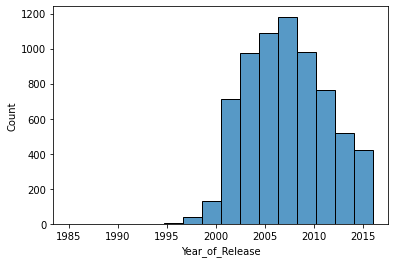

In [18]:
sns.histplot(x='Year_of_Release', data=df, bins=16)

`값의 범위가 넓어 히스토그램 분석이 어려울 경우, 아웃라이어를 제거하면서 히스토그램 확인`<br>
`아웃라이어는 rug plot으로 확인`

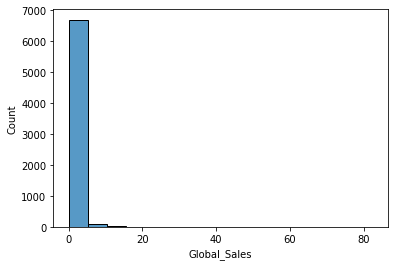

In [21]:
sns.histplot(x='Global_Sales', data=df, bins=16)

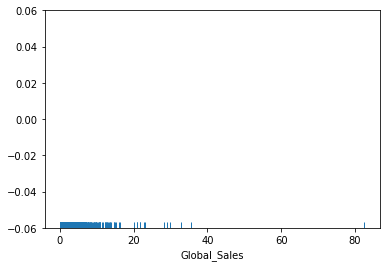

In [22]:
sns.rugplot(x='Global_Sales', data=df)

저렇게 많이 팔린 물건은 무엇인지 확인 : Wii Sports 

In [23]:
df[df['Global_Sales'] > 60]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


아웃라이어는 머신러닝의 학습에 방해가 되므로 상위 1%는 잘라준다.

In [25]:
gs1 = df['Global_Sales'].quantile(0.99)

In [26]:
df = df[df['Global_Sales'] < gs1]

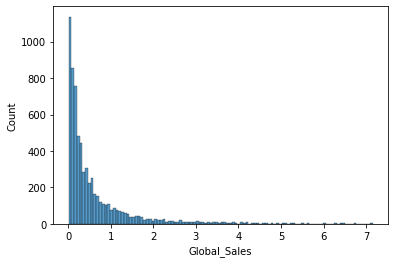

In [27]:
sns.histplot(x='Global_Sales', data=df)

장르별로 확인

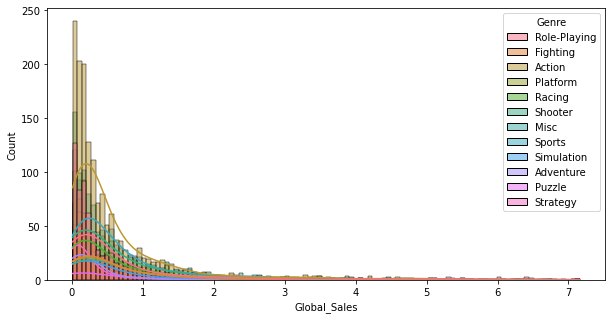

In [28]:
fig = plt.figure(figsize=(10,5))
sns.histplot(x='Global_Sales', hue='Genre', kde=True, data=df)

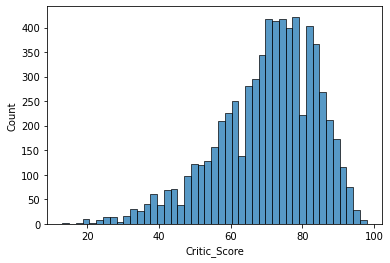

In [31]:
sns.histplot(x='Critic_Score', data=df)

In [51]:
# 수치형 데이터인데 object형이므로 변환
df['User_Score'] = df['User_Score'].apply(float)

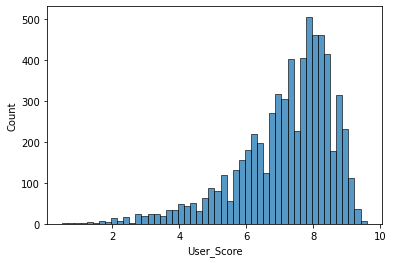

In [52]:
sns.histplot(x='User_Score', data=df)

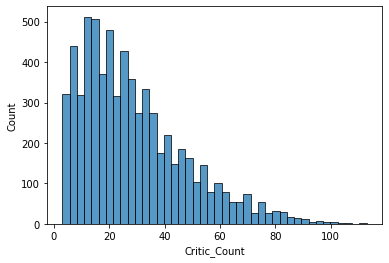

In [37]:
sns.histplot(x='Critic_Count', data=df)

user count도 아웃라이어가 있는 듯 하다

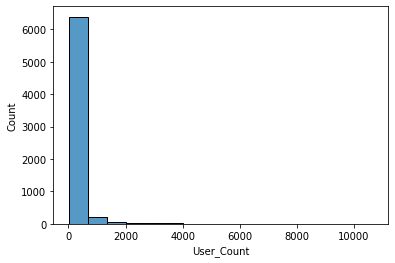

In [38]:
sns.histplot(x='User_Count', data=df, bins=16)

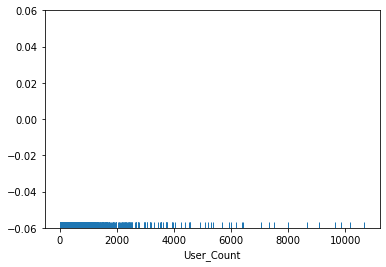

In [39]:
sns.rugplot(x='User_Count', data=df)

In [41]:
uc1 = df['User_Count'].quantile(0.99)
print(uc1)

2454.8999999999996


In [42]:
df = df[df['User_Count'] < uc1]

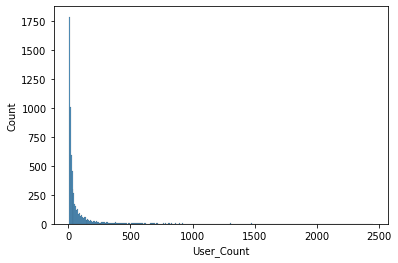

In [43]:
sns.histplot(x='User_Count', data=df)

In [44]:
uc_two = df['User_Count'].quantile(0.97)
print(uc_two)

911.5599999999977


In [45]:
df = df[df['User_Count'] < uc_two]

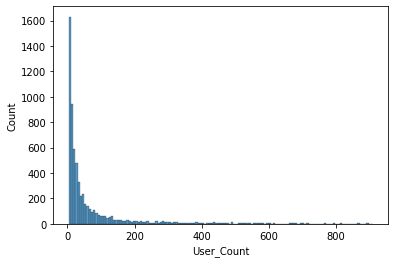

In [47]:
sns.histplot(x='User_Count', data=df)

## 수치형 데이터들과 전국 판매량의 관계 확인_Jointplot 

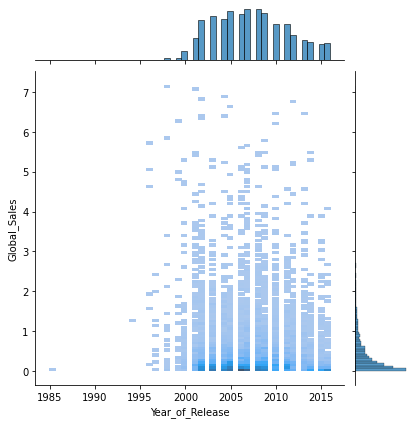

In [49]:
sns.jointplot(x='Year_of_Release', y='Global_Sales', data=df, kind='hist')

판매량과 년도는 상관성이 없어보임

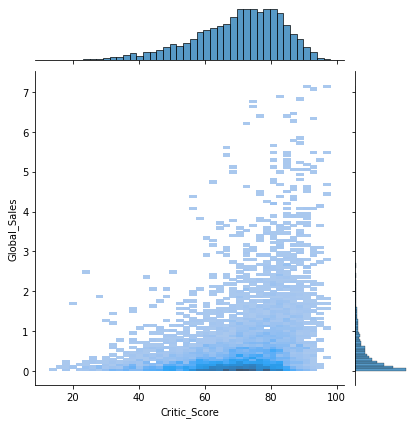

In [50]:
sns.jointplot(x='Critic_Score', y='Global_Sales', data=df, kind='hist')

Critic Score가 판매량을 보장해주지는 못하지만 그래도 Critic Score가 낮은 게임들은 대체로 판매량이 낮다

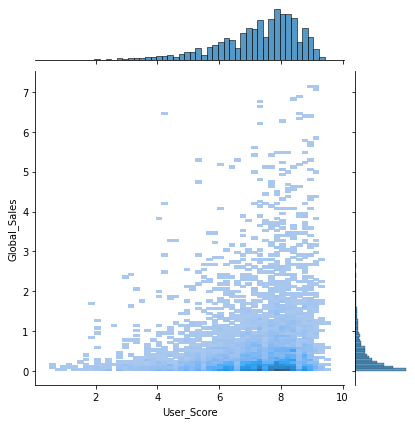

In [53]:
sns.jointplot(x='User_Score', y='Global_Sales', data=df, kind='hist')

자세한 상관성은 corr으로 파악할 수 있다

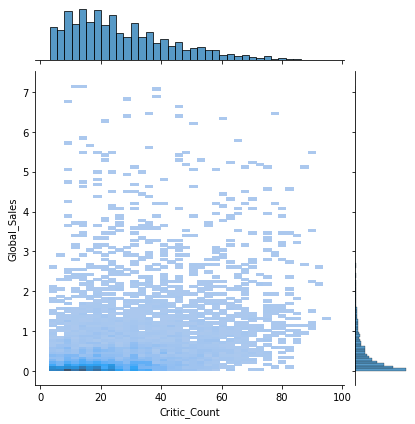

In [55]:
sns.jointplot(x='Critic_Count', y='Global_Sales', data=df, kind='hist')

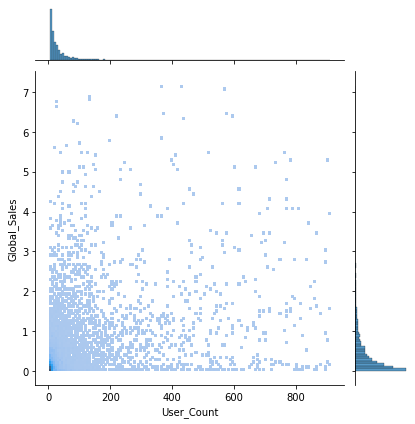

In [56]:
sns.jointplot(x='User_Count', y='Global_Sales', data=df, kind='hist')

`Global Sale`이 이루어 졌기에 `User Count`, `User Score`가 존재하는 것이다 => `Data leakage(데이터 누수)`

## 범주형 데이터들과 전국 판매량 분석_Box Plot

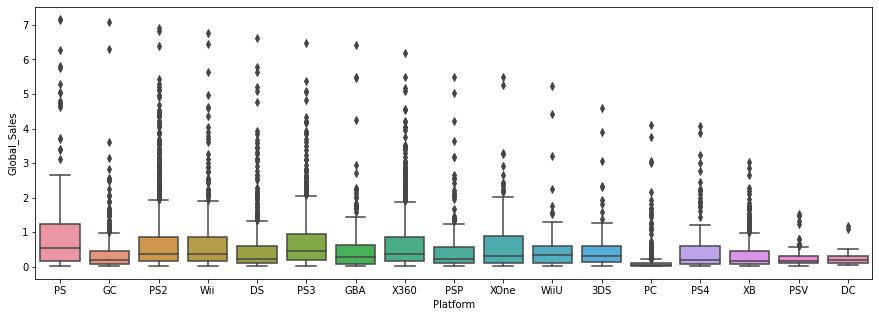

In [57]:
fig = plt.figure(figsize=(15,5))
sns.boxplot(x='Platform', y='Global_Sales', data=df)

playstation이 평균도 높고 상한치도 높은 편이다.

PC 게임들은 판매량이 저조한 게임들이 압도적으로 많아서 outlier가 있어보인다

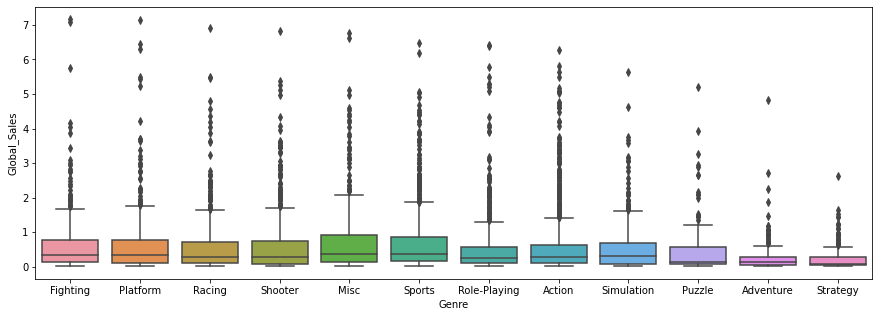

In [58]:
fig = plt.figure(figsize=(15,5))
sns.boxplot(x='Genre', y='Global_Sales', data=df)

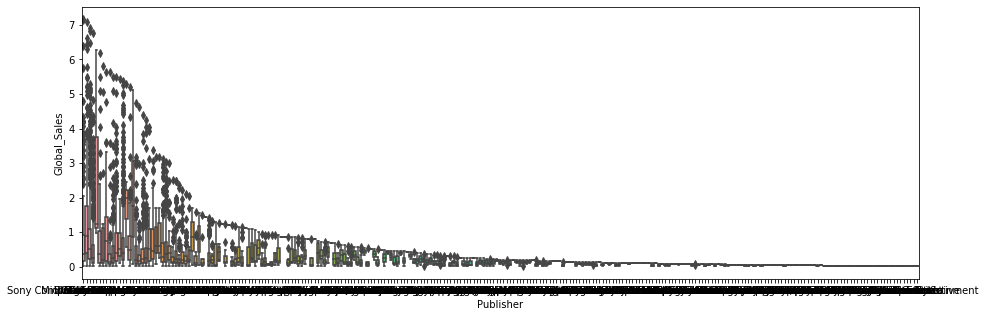

In [60]:
fig = plt.figure(figsize=(15,5))
sns.boxplot(x='Publisher', y='Global_Sales', data=df)

유통사들이 굉장히 많다. <br>
유통사들 간의 편차가 굉장히 커보인다.

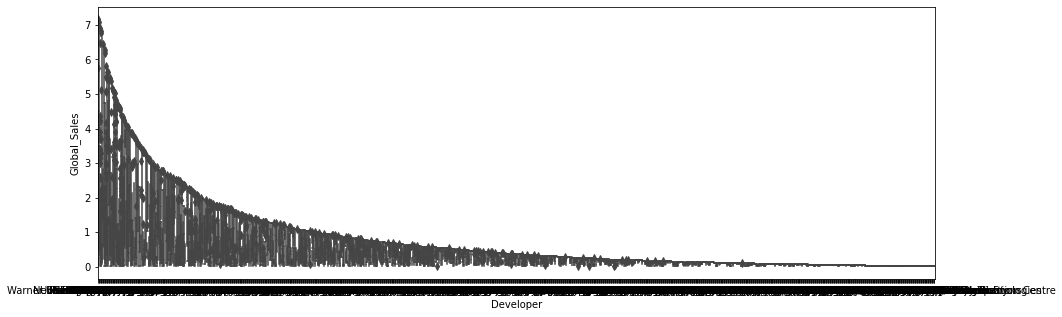

In [61]:
fig = plt.figure(figsize=(15,5))
sns.boxplot(x='Developer', y='Global_Sales', data=df)

소수 클래스들을 `others`로 묶어주는 작업이 필요해보인다.

## 전문가 평점과 사용자 평점의 차이 분석

두 값의 범위가 다르므로, 범위를 동일하게 맞추어 비교해야 한다.<br/>
별도의 DataFrame을 구성하여 boxplot으로 비교

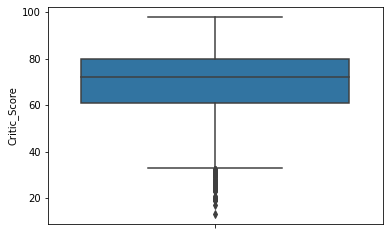

In [62]:
sns.boxplot(y='Critic_Score', data=df)

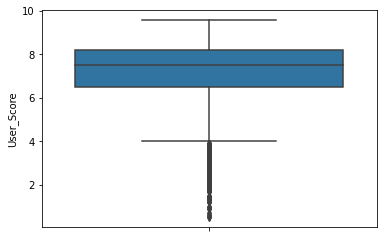

In [63]:
sns.boxplot(y='User_Score', data=df)

In [69]:
critic_score = df[['Critic_Score']].copy()
critic_score.rename({'Critic_Score':'Score'}, axis=1, inplace=True)
critic_score['ScoreBy'] = 'Critics'

In [70]:
critic_score

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,46.0,Critics
16677,81.0,Critics
16696,80.0,Critics
16700,61.0,Critics


In [74]:
user_score = df[['User_Score']].copy() * 10 # 범위가 달라서 *10해줌
user_score.rename({'User_Score':'Score'}, axis=1, inplace=True)
user_score['ScoreBy'] = 'Users'

In [75]:
scores = pd.concat([critic_score, user_score], axis=0)
scores

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,24.0,Users
16677,88.0,Users
16696,76.0,Users
16700,58.0,Users


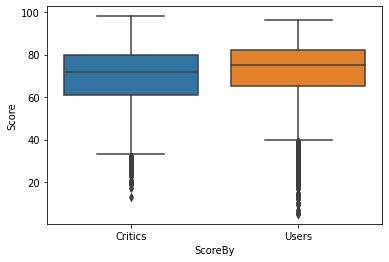

In [76]:
sns.boxplot(x='ScoreBy', y='Score', data=scores)

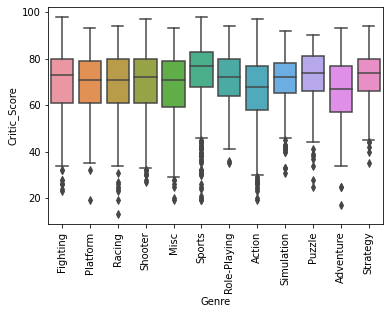

In [77]:
sns.boxplot(x='Genre', y='Critic_Score', data=df)
plt.xticks(rotation=90)
plt.show()

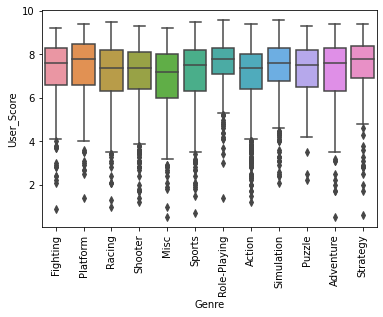

In [78]:
sns.boxplot(x='Genre', y='User_Score', data=df)
plt.xticks(rotation=90)
plt.show()

## 수치형 데이터간의 상관성 시각화

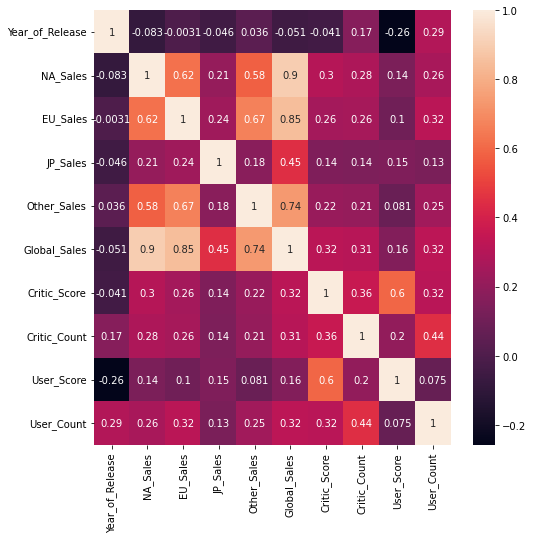

In [80]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

북미 판매량과 Global_Sales 간의 상관관계가 높은데, 미국 인구가 많기 때문에 미국에서 잘팔린다면 전세계 판매량에 영향을 주는 것일 듯

판매량이 높다고 해서 User Score가 높은 것은 아니다. 상관이 없다.

발매년도가 높을 수록 UserScore가 낮아지는 경향이 있다. 사람들의 눈이 높아지는 것으로 생각할 수 도 있다.

# 모델 학습을 위한 데이터 전처리 

## 너무 범주가 많은 데이터는 소수 범주를 others로 대체

In [81]:
df['Publisher'].value_counts()

Electronic Arts                902
Ubisoft                        468
Activision                     458
THQ                            301
Sony Computer Entertainment    287
                              ... 
Phantagram                       1
O-Games                          1
Level 5                          1
5pb                              1
Square EA                        1
Name: Publisher, Length: 253, dtype: int64

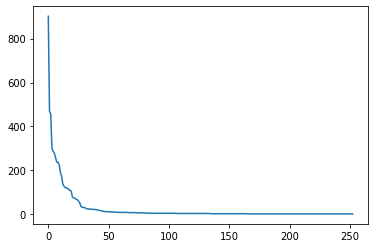

In [82]:
pb = df['Publisher'].value_counts()
plt.plot(range(len(pb)), pb)

In [95]:
df['Publisher'] = df['Publisher'].apply(lambda s: s if s not in pb[20:] else 'others')

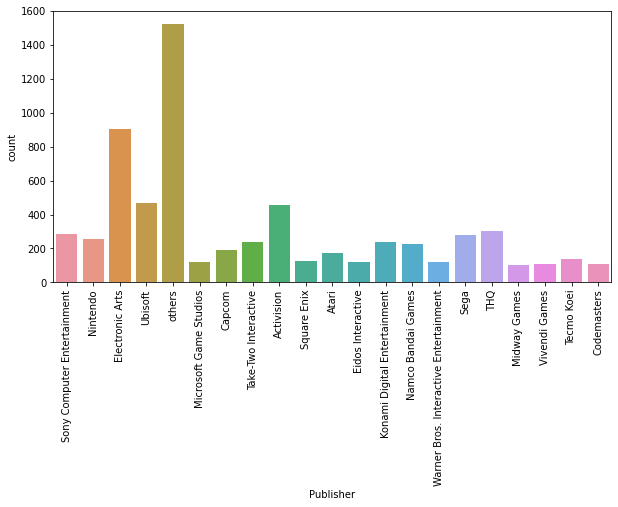

In [96]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Publisher', data=df)
plt.xticks(rotation=90)
plt.show()

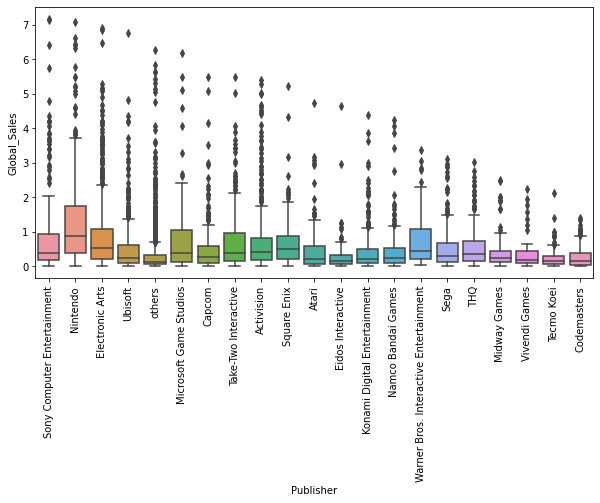

In [97]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='Publisher', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.show()

In [98]:
df['Developer'].value_counts()

EA Canada                   149
EA Sports                   140
Capcom                      122
Ubisoft                      96
Konami                       95
                           ... 
Good-Feel                     1
Nintendo, Spike Chunsoft      1
Zoo Games                     1
Ninja Studio                  1
Direct Action Games           1
Name: Developer, Length: 1272, dtype: int64

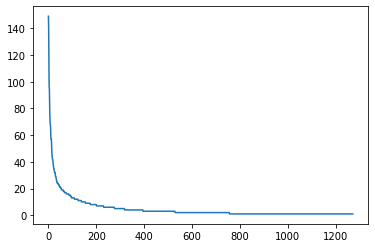

In [101]:
dev = df['Developer'].value_counts()
plt.plot(range(len(dev)), dev)

In [102]:
df['Developer'] = df['Developer'].apply(lambda s: s if s not in dev[20:] else 'others')

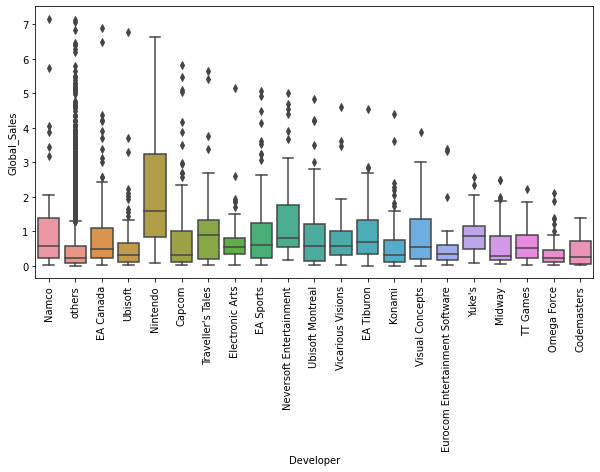

In [103]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='Developer', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.show()

## get_dummies를 이용한 범주형 데이터 전처리


In [104]:
cat_features

['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating']

In [106]:
X_cat = df[['Platform', 'Genre', 'Publisher']]
X_cat = pd.get_dummies(X_cat, drop_first=True) 
# drop_first는 첫번째 카테고리 값은 사용하지 않는다는 뜻이다. 왜냐하면 Pclass1~3이 있다면 Pclass_1은 제거하는데 이는 Pclass_2와 Pclass_3이 둘다 0 이면 Pclass_1임을 알 수 있기 때문에 없앨 수 있다는 것이다.

# 전국 판매량 Regression 모델 학습

## 전국 판매량 추정을 위한 입출력 데이터 구성


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [110]:
# 전국 판매량 추정을 위해 적절한 입력과 출력 컬럼 선정 (data leakeage 문제가 있어보이는 칼럼이 있어보임)
# 수치형 데이터는 StandardScaler를 이용해 표준화
X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)

y = df['Global_Sales'] 

In [111]:
X.head()

,Year_of_Release,Critic_Score,Critic_Count,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Atari,Publisher_Capcom,Publisher_Codemasters,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Microsoft Game Studios,Publisher_Midway Games,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
106,-2.237912,1.944152,-0.704478,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
109,-2.237912,1.577371,-0.874440,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
111,-1.514757,1.650727,0.598567,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
113,-0.791602,0.917163,0.655221,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,-1.273706,1.357302,0.088680,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=216)

## XGBoost 모델 생성/학습

In [113]:
from xgboost import XGBRegressor

In [114]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[17:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

## Linear Regression 모델 생성/학습

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

## 모델 학습 결과 평가

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [118]:
# predict
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_absolute_error(y_test, pred_xgb)))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_absolute_error(y_test, pred_lr)))

XGB MAE: 0.42658220115293277
XGB RMSE: 0.6531326061014966
LR MAE: 0.4594066070653831
LR RMSE: 0.6777954020686354


## 실제 값과 추측 값의 Scatter plot 시각화


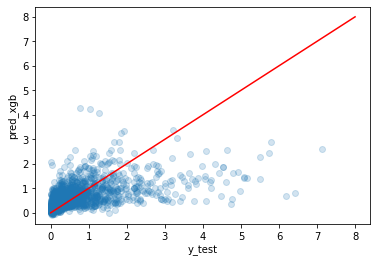

In [121]:
plt.scatter(y_test, pred_xgb, alpha=0.2)
plt.plot([0,8],[0,8], 'r-')
plt.xlabel('y_test')
plt.ylabel('pred_xgb')
plt.show()

적게 팔린 것은 over estimated 하는 경향 <br>
많이 팔린 것은 under estimated 하는 경향

판매량이 많은 것들은 대부분 outlier여서 판매량이 적은 쪽을 잘 예측하는데 치중하게 되어 판매량이 많은 쪽은 평가가 좋게 나오지 않게 된다. => `regression의 문제점`

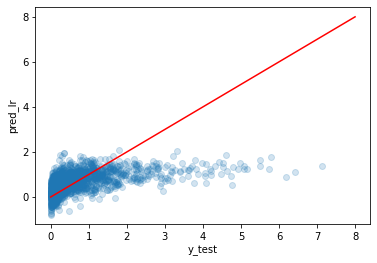

In [122]:
plt.scatter(y_test, pred_lr, alpha=0.2)
plt.plot([0,8],[0,8], 'r-')
plt.xlabel('y_test')
plt.ylabel('pred_lr')
plt.show()

linear Regression은 값들을 단순하게 weighting 해서 더하기 때문에 올라가는 쪽에 fitting하게 되어서 음수 값이 생기게 된다. 

## XGBoost 모델의 Feature Importance 시각화

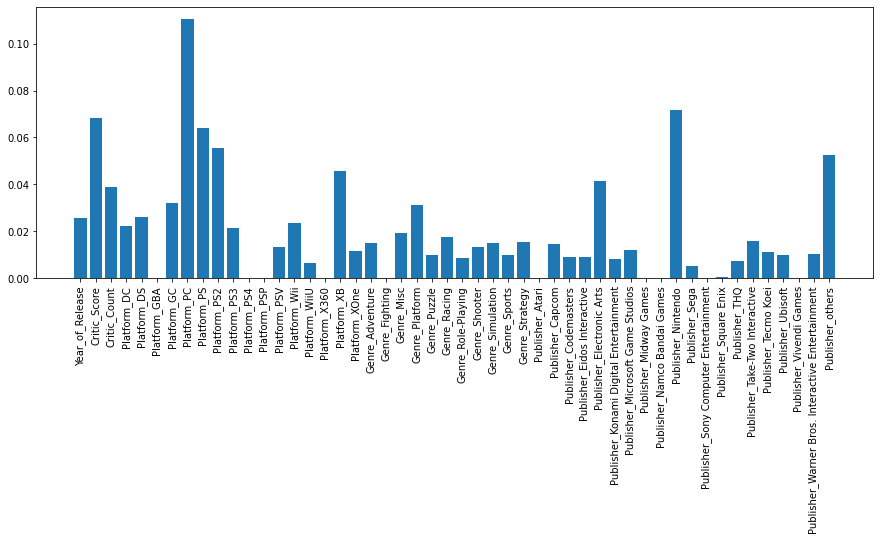

In [123]:
fig = plt.figure(figsize=(15,5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 유저 평점 Regression 모델 학습

## 입출력 데이터 구성


In [124]:
X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)

X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1) 
y = df['User_Score']

In [125]:
# 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=216)

## XGBoost 모델 생성/학습

In [126]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[17:17:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

## Linear Regression 모델 생성/학습

In [127]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

## 모델 학습 결과 평가

In [128]:
#  mean_absolute_error, rmse 
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))

XGB MAE: 0.7453647806513413
XGB RMSE: 1.0112093116387124
LR MAE: 0.7776132526759734
LR RMSE: 1.0390225644866298


##실제 값과 추측 값의 Scatter plot 시각화


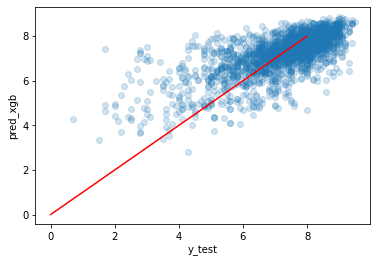

In [131]:
plt.scatter(y_test, pred_xgb, alpha=0.2)
plt.plot([0,8],[0,8], 'r-')
plt.xlabel('y_test')
plt.ylabel('pred_xgb')
plt.show()

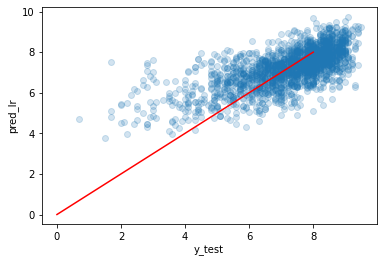

In [130]:
plt.scatter(y_test, pred_lr, alpha=0.2)
plt.plot([0,8],[0,8], 'r-')
plt.xlabel('y_test')
plt.ylabel('pred_lr')
plt.show()

## XGBoost 모델의 Feature Importance 시각화

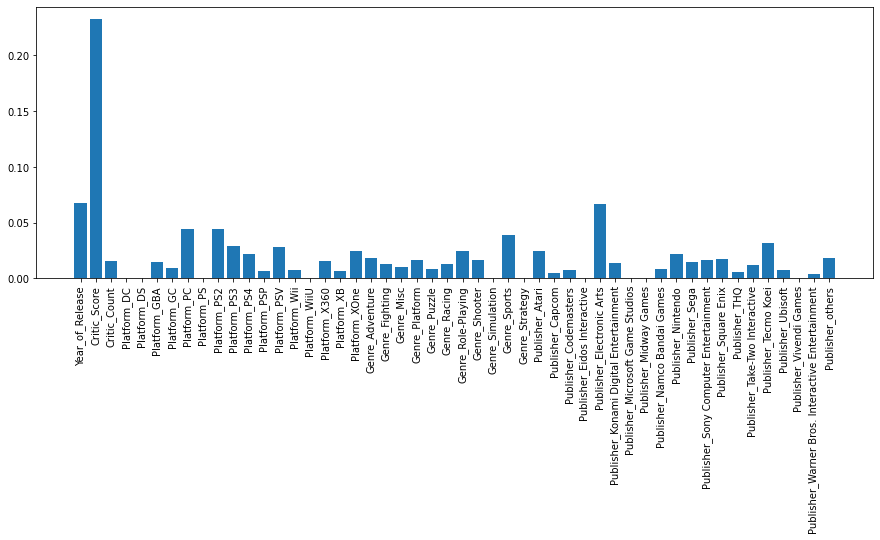

In [132]:
fig = plt.figure(figsize=(15,5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()